# Imports

In [1]:
import pandas as pd
import numpy as np
from recommender import load_raw_data
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Loading & Inspecting Data

In [2]:
# load
original_df = load_data()

NameError: name 'load_data' is not defined

In [163]:
# copy 
df = original_df.copy()

In [ ]:
# load
df = load_raw_data()

# get first 5
pd.set_option('display.max_columns', None)
print("df.head()=================================================")
print(df.head())

# get data structure
print("df.dtypes=================================================")
print(df.dtypes)

# get num of nulls
print("df.isnul().sum()=================================================")
print(df.isnull().sum())

# get num of uniques
print("df.nunique()=================================================")
print(df.nunique())

[INFO] CSV already exists at c:\Users\mensu\Documents\Last Sem\CS506\projects\CS506_FinalProject\new-game-plus-backend\newgameplus\data\games.csv
df.head()=================================================
    appid                             name release_date  required_age  price  \
0     730                 Counter-Strike 2   2012-08-21             0   0.00   
1  578080              PUBG: BATTLEGROUNDS   2017-12-21             0   0.00   
2     570                           Dota 2   2013-07-09             0   0.00   
3  271590        Grand Theft Auto V Legacy   2015-04-13            17   0.00   
4  488824  Tom Clancy's Rainbow Six® Siege   2015-12-01            17  19.99   

   dlc_count                               detailed_description  \
0          1  For over two decades, Counter-Strike has offer...   
1          0  LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...   
2          2  The most-played game on Steam. Every day, mill...   
3          0  When a young street hustler, a r

# Preprocessing

In [19]:
# remove the null name rows
df = df.drop(df.loc[df['name'].isna()].index)

# drop USELESS columns
df = df.drop(['name','tags','reviews', 'detailed_description', 'about_the_game', 'short_description', 'header_image', 'website', 'support_url','support_email','metacritic_url','notes', 'packages', 'developers', 'publishers','screenshots', 'movies','user_score','score_rank','estimated_owners','positive','negative'], axis=1) # edw: undrop reviews and sentiment thing

In [20]:
# clean data
df['release_date_cleaned'] = pd.to_datetime(df['release_date'], errors='coerce')
df = df.drop(['release_date'], axis=1)




In [5]:
#Idetnfying the unique supported_languages


#print(type(df['supported_languages'].iloc[0]))

#def clean_language(lang):
    # Remove leading/trailing whitespace and newlines
#    lang = lang.strip()
    # Remove HTML-like tags (like [b][/b])
#    lang = re.sub(r'\[/?b\]', '', lang)
    # Strip again after removing tags
#    lang = lang.strip()
#    return lang


#df['supported_languages'] = df['supported_languages'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x) 

#unique_supported_languages = set()

#for langs in df['supported_languages']:  # Replace with your actual column name
#    if isinstance(langs, list):
#        for lang in langs:
            # Some entries may still have multiple langs joined with commas
#            for l in lang.split(','):
#                cleaned = clean_language(l)
#                unique_supported_languages.add(cleaned)

#unique_supported_languages = list(unique_supported_languages)
#print("Unique supported languages", unique_supported_languages)


In [21]:
#One hot encoding the languages

#lang_columns = {}

#for lang in unique_supported_languages:
#    lang_columns[lang+"_supported_languages"] = df['supported_languages'].apply(lambda x: 1 if lang in x else 0)

#lang_df = pd.DataFrame(lang_columns)

#df = pd.concat([df, lang_df], axis=1)

df.drop("supported_languages", axis = 1, inplace = True)

#print(df.head())

In [7]:
#identify the unique supported audios
#df['full_audio_languages'] = df['full_audio_languages'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x) 

#unique_full_audio_languages = set()

#for langs in df['full_audio_languages']:  # Replace with your actual column name
#    if isinstance(langs, list):
#        for lang in langs:
            # Some entries may still have multiple langs joined with commas
#            for l in lang.split(','):
#                cleaned = clean_language(l)
#                unique_full_audio_languages.add(cleaned)

#unique_full_audio_languages = list(unique_full_audio_languages)
#print("Unique Full Audio Languages:", unique_full_audio_languages)

In [22]:
#one hot encoding full audio languages

#audio_lang_columns = {}

#for audio_lang in unique_full_audio_languages:
#    audio_lang_columns[audio_lang+"_full_audio_languages"] = df['full_audio_languages'].apply(lambda x: 1 if lang in x else 0)

#audio_lang_df = pd.DataFrame(audio_lang_columns)

#df = pd.concat([df, audio_lang_df], axis=1)

df.drop("full_audio_languages", axis=1, inplace=True)


#print(df.head())

In [23]:
#Identifying the unique genres
import ast
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

unique_genres = set()

for genres in df['genres']:
    if isinstance(genres, list):
        unique_genres.update(genres)

unique_genre_list = list(unique_genres)
#print("Unique genres:", unique_genre_list)

In [24]:
#One hot encoding the genres
for genre in unique_genres:
    df[genre] = df['genres'].apply(lambda x: 1 if genre in x else 0)

df.drop("genres", axis=1, inplace=True)


#print(df.head())

In [25]:
#identifying unique categories

import ast
df['categories'] = df['categories'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

unique_categories = set()

for categories in df['categories']:
    if isinstance(categories, list):
        unique_categories.update(categories)

unique_categories_list = list(unique_categories)
#print("Unique categories:", unique_categories_list)

In [26]:
#One hot encoding the genres

for categories in unique_categories:
    df[categories] = df['categories'].apply(lambda x: 1 if categories in x else 0)

df.drop("categories", axis=1, inplace=True)

#print(df.head())

In [27]:
# convert boolean into numerical
df['windows'] = df['windows'].astype(int)
df['mac'] = df['mac'].astype(int)
df['linux'] = df['linux'].astype(int)


In [28]:
# drop datetime
df = df.drop('release_date_cleaned', axis=1)

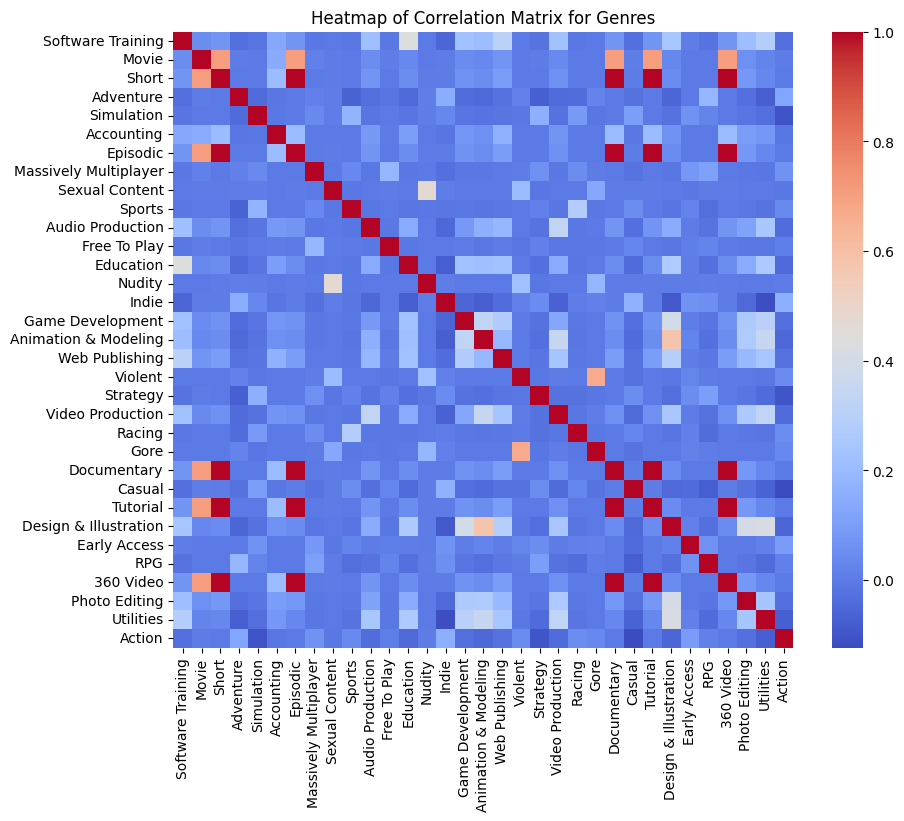

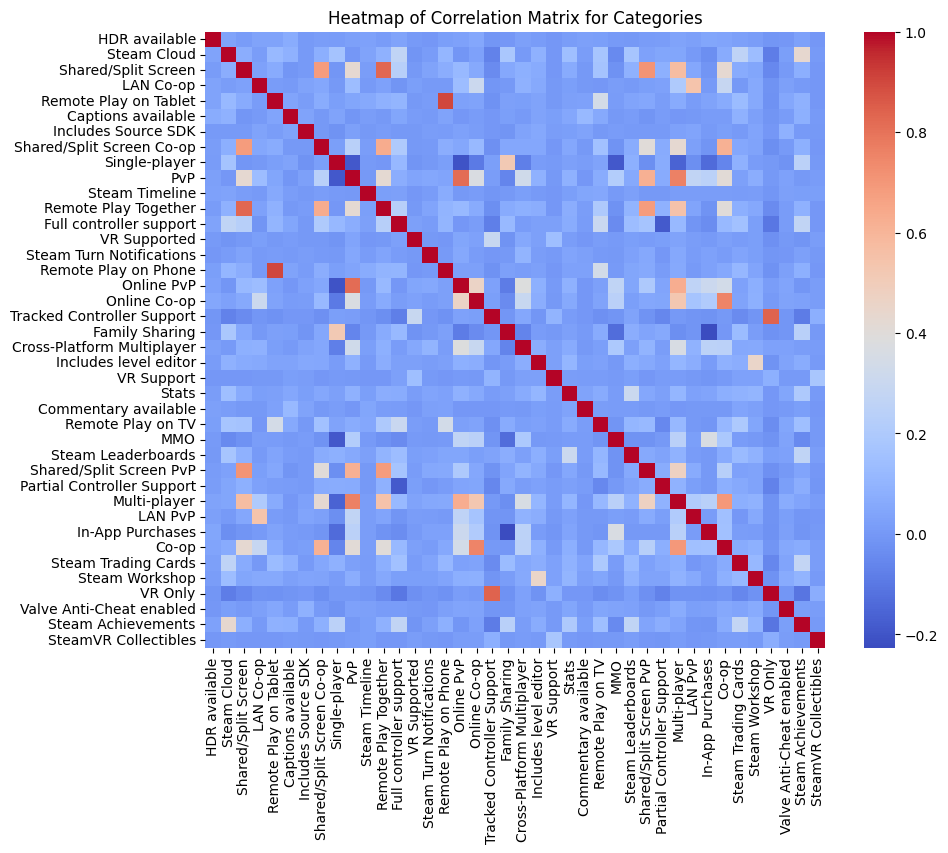

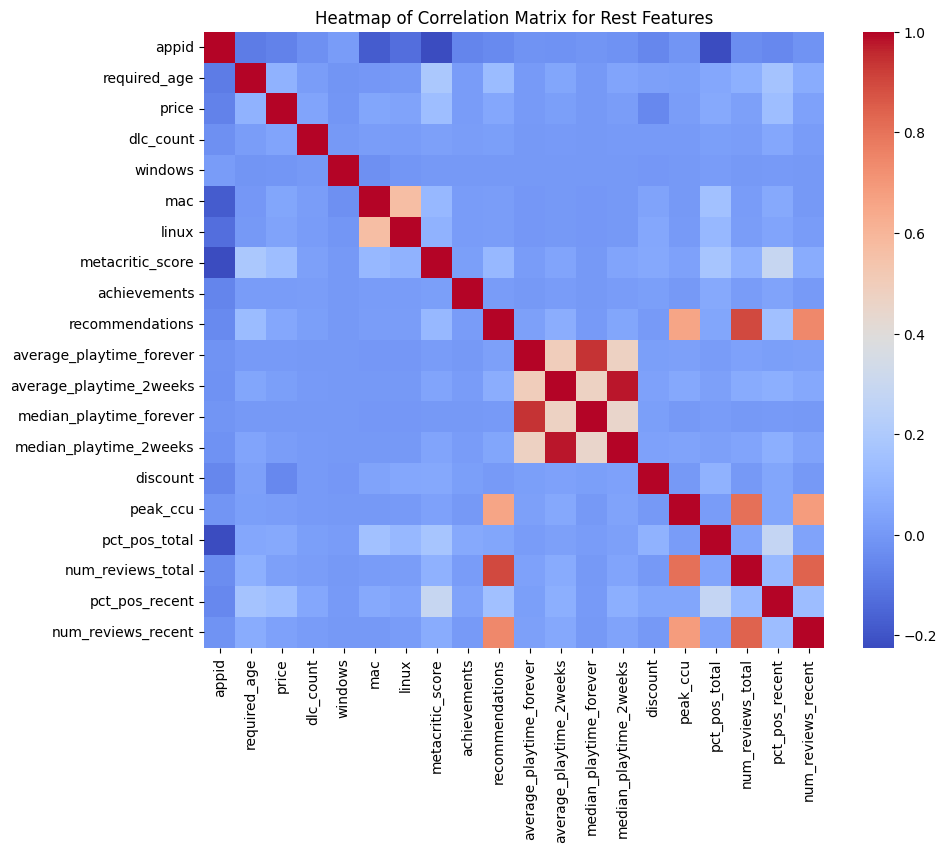

In [29]:
# heatmap correlation for genres
# we can find out what genres to drop (the dependent ones)
X = df[unique_genre_list].copy()

plt.figure(figsize=(10, 8))  
sns.heatmap(X.corr(), cmap="coolwarm")  
plt.title("Heatmap of Correlation Matrix for Genres")  
plt.show()

# heatmap correlation for categories
X = df[unique_categories_list].copy()
plt.figure(figsize=(10, 8))  
sns.heatmap(X.corr(), cmap="coolwarm")  
plt.title("Heatmap of Correlation Matrix for Categories")  
plt.show()

# heatmap correlation for categories
X = df[remaining_columns].copy()
plt.figure(figsize=(10, 8))  
sns.heatmap(X.corr(), cmap="coolwarm")  
plt.title("Heatmap of Correlation Matrix for Rest Features")  
plt.show()

# TODO: merge similar features based on this

In [30]:
pd.set_option('display.max_columns', None)
# combine all column lists
all_columns = unique_genre_list + unique_categories_list + remaining_columns

# filter the DataFrame for those columns
X = df[all_columns].copy()
X

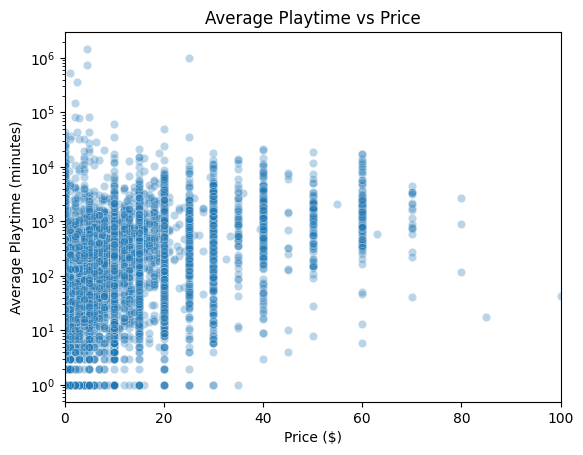

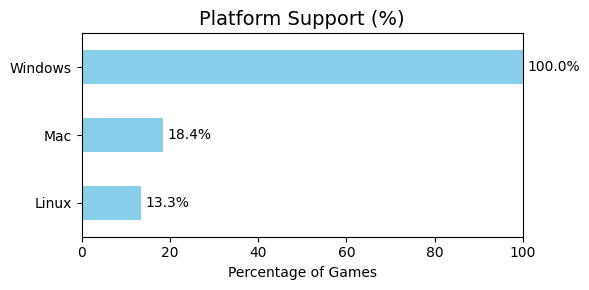

In [31]:
# Plot of price vs average playtime
sns.scatterplot(data=df, x='price', y='average_playtime_forever', alpha=0.3)
plt.xlim(0, 100)
plt.yscale('log')
plt.title('Average Playtime vs Price')
plt.xlabel('Price ($)')
plt.ylabel('Average Playtime (minutes)')
plt.show()

# Plot of percentage of games supported on each platform
platform_support = df[['windows', 'mac', 'linux']].mean().rename({
    'windows': 'Windows',
    'mac': 'Mac',
    'linux': 'Linux'
}) * 100

plt.figure(figsize=(6, 3))
platform_support.sort_values().plot(kind='barh', color='skyblue')

for i, (value, label) in enumerate(zip(platform_support.sort_values(), platform_support.sort_values().index)):
    plt.text(value + 1, i, f'{value:.1f}%', va='center', fontsize=10)

plt.title('Platform Support (%)', fontsize=14)
plt.xlabel('Percentage of Games')
plt.xlim(0, 100)
plt.tight_layout()
plt.show()



# MODELING

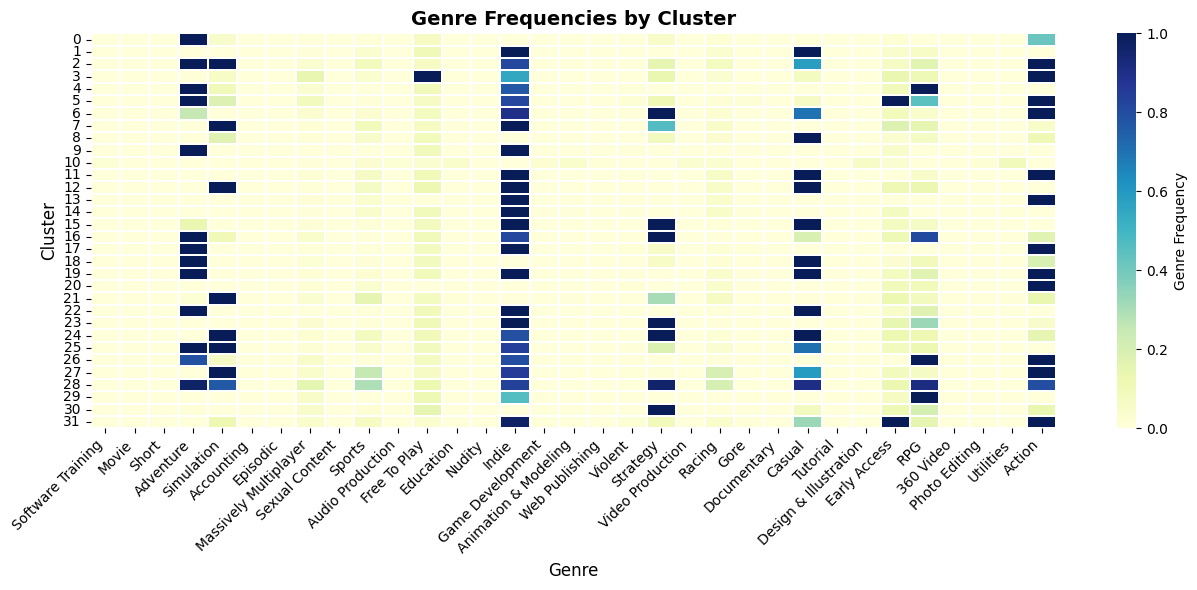

Number of games per genre cluster:
genre_cluster
0     3764
1     6795
2     1793
3     1542
4     2226
5     1617
6     1676
7     2785
8     5297
9     4063
10    7326
11    3742
12    2637
13    5151
14    3294
15    2655
16    1700
17    4941
18    2096
19    2621
20    3100
21    2865
22    4158
23    1947
24    1602
25    2453
26    2573
27    1324
28    1168
29    2060
30    2145
31    1830
Name: count, dtype: int64


In [45]:
# Scale the data
scaler = StandardScaler()
X = df[unique_genre_list].copy()

# Use KMeans to cluster the genres, run many times to get the best result
kmeans = KMeans(n_clusters=32, init='k-means++', n_init=250, random_state=97)
cluster_labels = kmeans.fit_predict(X)

# Assign cluster labels to dataframe
df['genre_cluster'] = cluster_labels

# Elbow method to find the optimal number of clusters
# inertia_vals = []
# k_values = range(2, 20)

# for k in k_values:
#     km = KMeans(n_clusters=k, init='k-means++')
#     km.fit(X)
#     inertia_vals.append(km.inertia_)

# plt.figure()
# plt.plot(k_values, inertia_vals, marker='o', linestyle='--')
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('Inertia')
# plt.title('Elbow Method for Genre Clustering')
# plt.tight_layout()
# plt.show()

# Heatmap of genre frequencies by cluster
df_genres = df[unique_genre_list + ['genre_cluster']]
cluster_genre_means = df_genres.groupby('genre_cluster')[unique_genre_list].mean()

plt.figure(figsize=(len(unique_genre_list) * 0.4, 6))
sns.heatmap(cluster_genre_means,
            cmap='YlGnBu',
            linewidths=0.3,
            cbar_kws={'label': 'Genre Frequency'})

plt.title("Genre Frequencies by Cluster", fontsize=14, weight='bold')
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Cluster", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print the number of games in each cluster
cluster_counts = df['genre_cluster'].value_counts().sort_index()
print("Number of games per genre cluster:")
print(cluster_counts)

In [46]:
# find how well the clustering went
score = silhouette_score(X, cluster_labels)
print(score)

0.44163495421101123


/var/folders/rg/ktck18k10tn_9fm_2btps4g40000gn/T/ipykernel_77423/2353188628.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_cluster', y='price', data=df, palette='Set2')


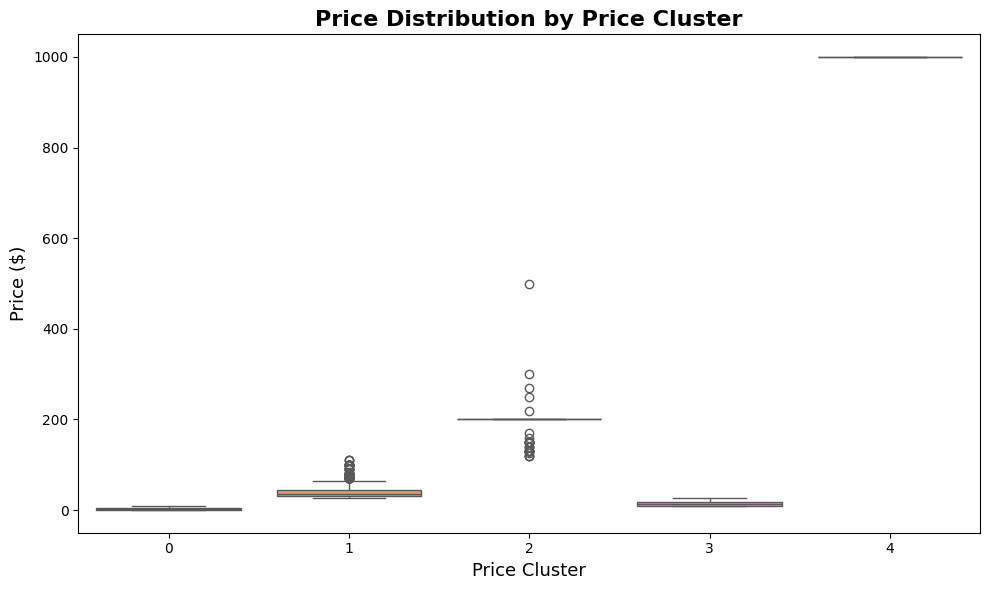

Number of games per price cluster:
price_cluster
0    68174
1     2721
2      178
3    23870
4        3
Name: count, dtype: int64


In [38]:
# Create a copy of the dataframe for price clustering
X_price = df[['price']].copy()

# Scale the data
scaler = StandardScaler()
X_price_scaled = scaler.fit_transform(X_price)

# Use KMeans to cluster the price, run many times to get the best result
kmeans_price = KMeans(n_clusters=5, init='k-means++', n_init=250, random_state=97)
price_cluster_labels = kmeans_price.fit_predict(X_price_scaled)

# Assign cluster labels to dataframe
df['price_cluster'] = price_cluster_labels

# Elbow method to find the optimal number of clusters
# inertia_vals_price = []
# k_values = range(2, 100)

# for k in k_values:
#     km = KMeans(n_clusters=k, init='k-means++')
#     km.fit(X_price_scaled)
#     inertia_vals_price.append(km.inertia_)

# plt.figure()
# plt.plot(k_values, inertia_vals_price, marker='o', linestyle='--')
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('Inertia')
# plt.title('Elbow Method for Price Clustering')
# plt.tight_layout()
# plt.show()

# Boxplot of price distribution by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_cluster', y='price', data=df, palette='Set2')
plt.title("Price Distribution by Price Cluster", fontsize=16, weight='bold')
plt.xlabel("Price Cluster", fontsize=13)
plt.ylabel("Price ($)", fontsize=13)
plt.tight_layout()
plt.show()

# Print the number of games in each price cluster
price_cluster_counts = df['price_cluster'].value_counts().sort_index()
print("Number of games per price cluster:")
print(price_cluster_counts)


In [24]:
# find how well the clustering went
score = silhouette_score(X, price_cluster_labels)
print(score)

0.030489028274088323


/var/folders/rg/ktck18k10tn_9fm_2btps4g40000gn/T/ipykernel_77423/1216536413.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ccu_cluster', y='peak_ccu', data=df, palette='Set2')


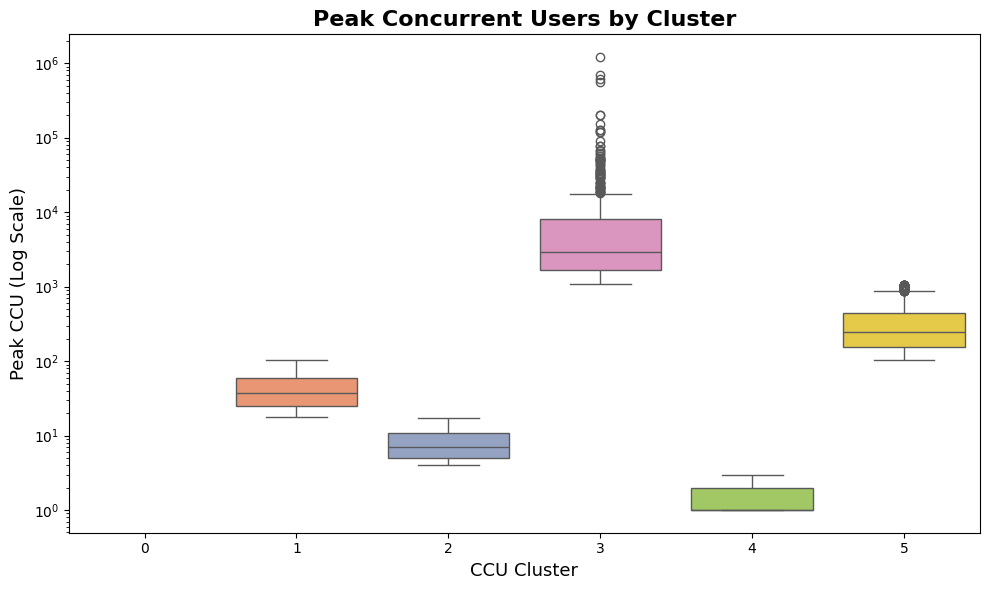

Number of games per CCU cluster:
ccu_cluster
0    76006
1     2507
2     4417
3      533
4    10002
5     1481
Name: count, dtype: int64


In [39]:
# Create a copy of the dataframe for CCU clustering
df['peak_ccu_log'] = np.log1p(df['peak_ccu'])  # log1p handles 0 values safely
X_ccu_log = df[['peak_ccu_log']].copy()

# Scale the data
scaler = StandardScaler()
X_ccu_log_scaled = scaler.fit_transform(X_ccu_log)

# Use KMeans to cluster the log peak CCU, run many times to get the best result
kmeans_ccu = KMeans(n_clusters=6, init='k-means++', n_init=250, random_state=97)
ccu_cluster_labels = kmeans_ccu.fit_predict(X_ccu_log_scaled)

# Assign cluster labels to dataframe
df['ccu_cluster'] = ccu_cluster_labels

# Elbow method to find the optimal number of clusters
# inertia_vals_ccu = []
# k_values = range(2, 30)

# for k in k_values:
#     km = KMeans(n_clusters=k, init='k-means++')
#     km.fit(X_ccu_log_scaled)
#     inertia_vals_ccu.append(km.inertia_)

# plt.figure()
# plt.plot(k_values, inertia_vals_ccu, marker='o', linestyle='--')
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('Inertia')
# plt.title('Elbow Method for Log Peak CCU Clustering')
# plt.tight_layout()
# plt.show()

# Boxplot of peak CCU distribution by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='ccu_cluster', y='peak_ccu', data=df, palette='Set2')
plt.yscale('log')  # Important: CCU still spans large values
plt.title("Peak Concurrent Users by Cluster", fontsize=16, weight='bold')
plt.xlabel("CCU Cluster", fontsize=13)
plt.ylabel("Peak CCU (Log Scale)", fontsize=13)
plt.tight_layout()
plt.show()

# Print the number of games in each CCU cluster
ccu_cluster_counts = df['ccu_cluster'].value_counts().sort_index()
print("Number of games per CCU cluster:")
print(ccu_cluster_counts)


In [40]:
# find how well the clustering went
score = silhouette_score(X, ccu_cluster_labels)
print(score)

KeyboardInterrupt: 

In [47]:
df.to_pickle("data/clustered_steam_data.pkl")